In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy
import matplotlib as mpl
mpl.rc('savefig', dpi=300)

from tvb.tests.library import setup_test_console_env
setup_test_console_env()

from tvb.simulator.monitors import MonitorTransforms
from tvb.simulator import models, coupling, integrators, noise, simulator
from tvb.datatypes import connectivity
from tvb.simulator.monitors import Raw


# Monitoring with transformations

Very often it's useful to apply specific transformations to the state variables before applying the observation model of a monitor. Additionally, it can be useful to apply other transformations on the monitor's output.

The `pre_expr` and `post_expr` attributes of the `Monitor` classes allow for this.

In [35]:
sim = simulator.Simulator(
    model=models.Generic2dOscillator(),
    connectivity=connectivity.Connectivity(load_default=True),
    coupling=coupling.Linear(),
    integrator=integrators.EulerDeterministic(),
    monitors=Raw(pre_expr='V;W;V**2;W-V', post_expr=';;sin(mon);exp(mon)'))

sim.configure()

ts, ys = [], []
for (t, y), in sim(simulation_length=250):
    ts.append(t)
    ys.append(y)
t = numpy.array(ts)
v, w, sv2, ewmv = numpy.array(ys).transpose((1, 0, 2, 3))

Plotting the results demonstrates the effect of the transformations of the state variables through the monitor. Here, a `Raw` monitor was used to make the effects clear, but the pre- and post-expressions can be provided to any of the `Monitor`s.

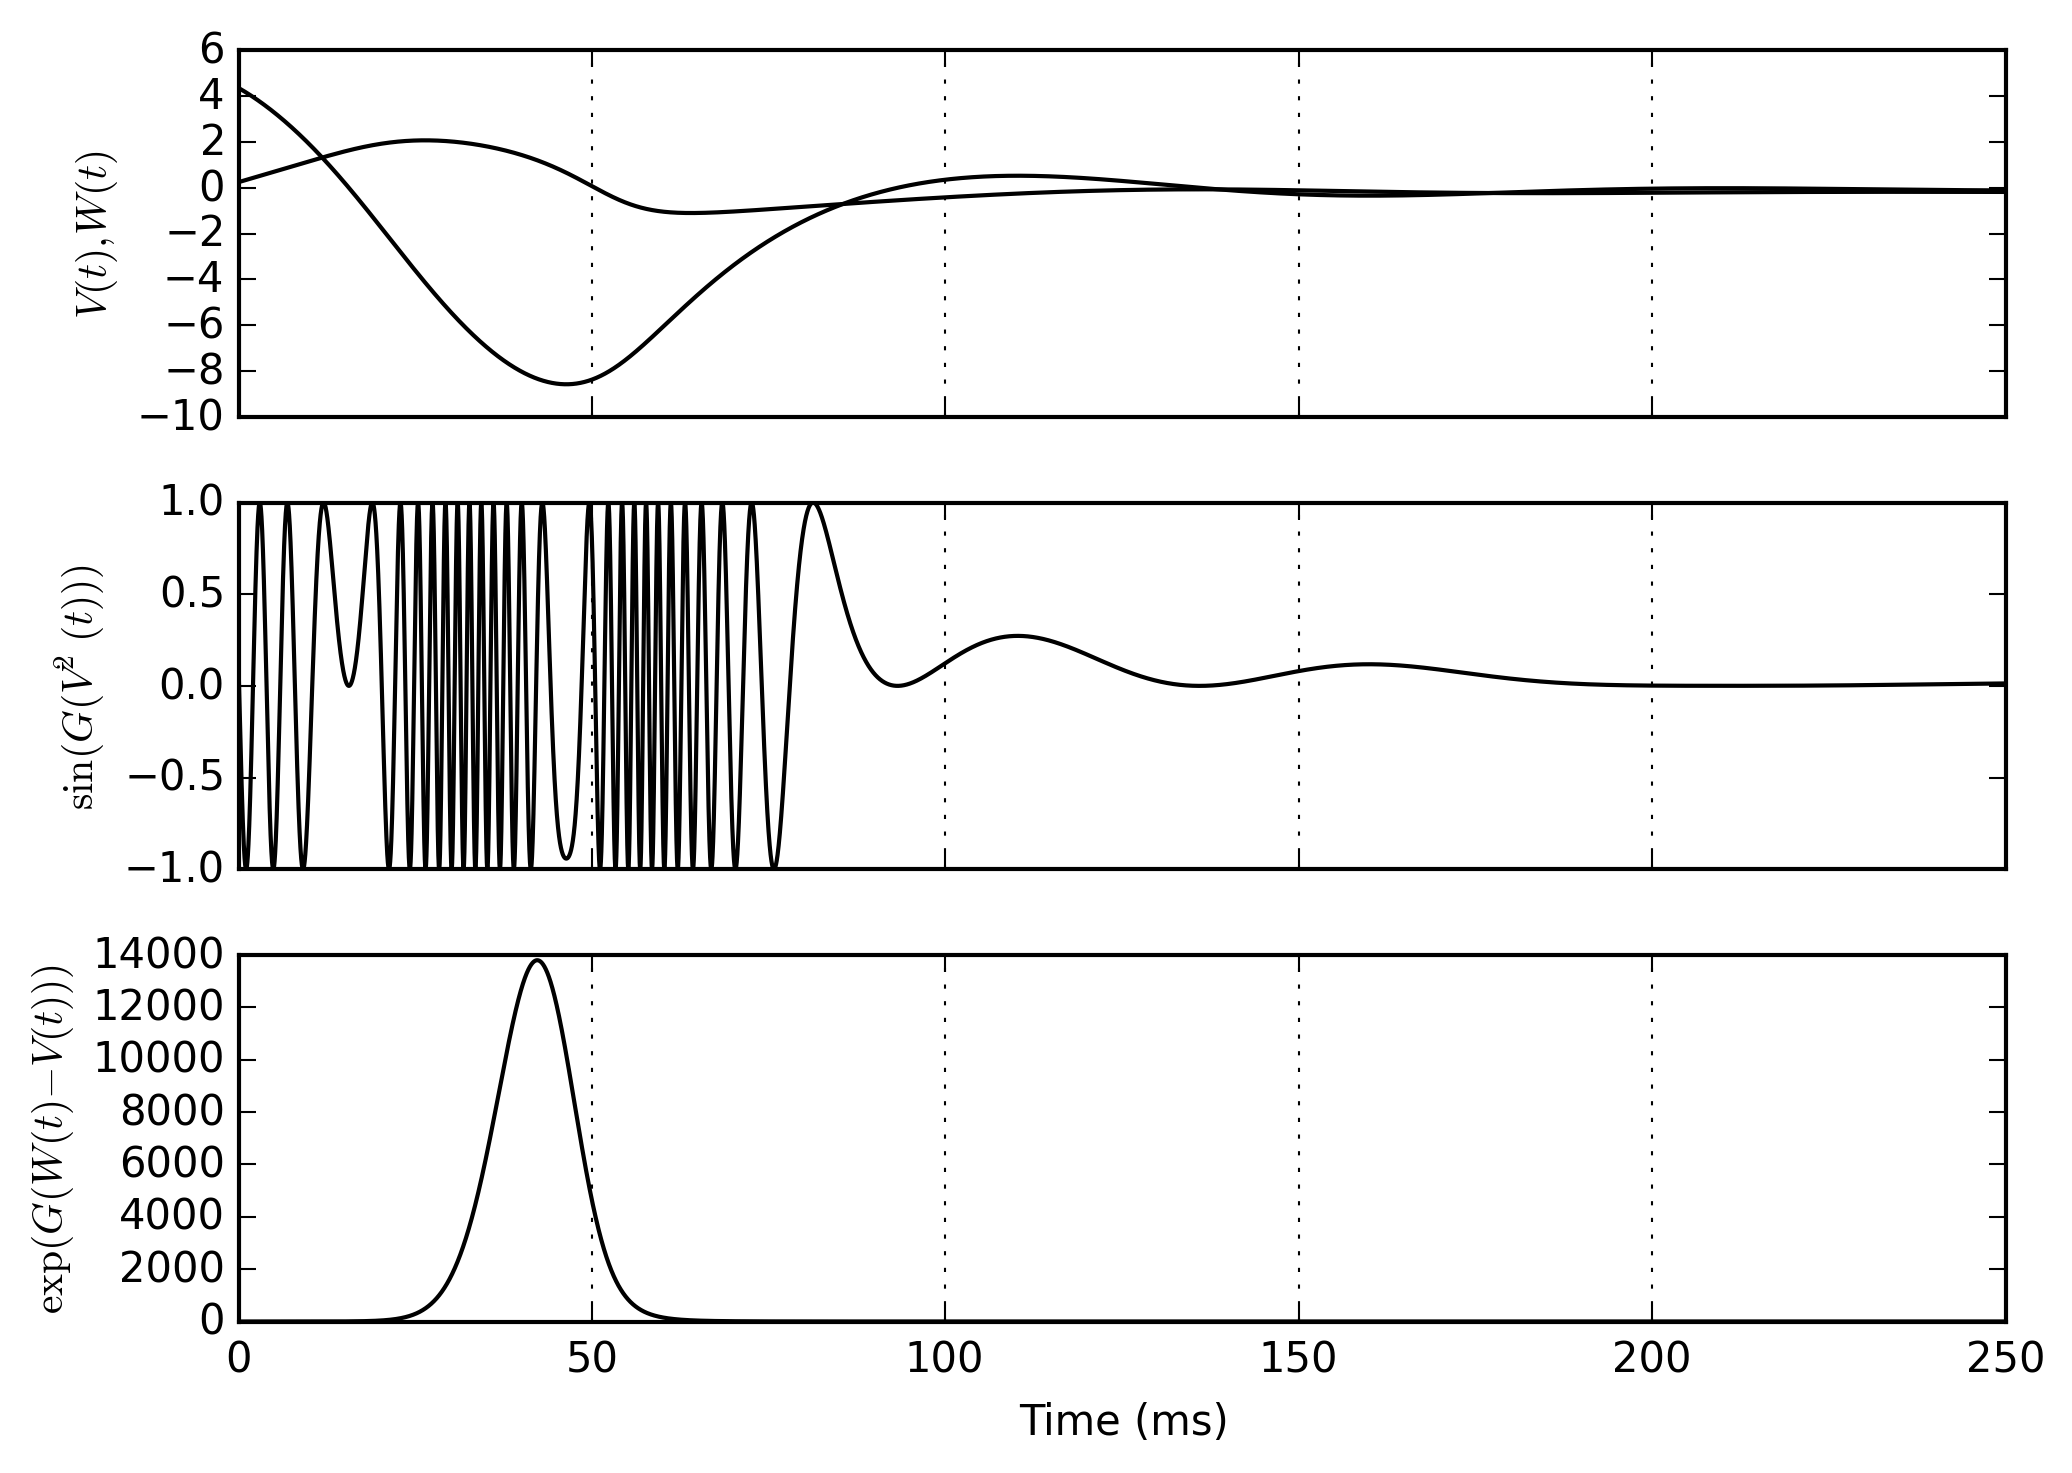

In [36]:
figure(figsize=(7, 5), dpi=600)

subplot(311)
plot(t, v[:, 0, 0], 'k')
plot(t, w[:, 0, 0], 'k')
ylabel('$V(t), W(t)$')
grid(True, axis='x')
xticks(xticks()[0], [])

subplot(312)
plot(t, sv2[:, 0, 0], 'k')
ylabel('$\\sin(G(V^2(t)))$')
grid(True, axis='x')
xticks(xticks()[0], [])

subplot(313)
plot(t, ewmv[:, 0, 0], 'k')
ylabel('$\\exp(G(W(t)-V(t)))$')
grid(True, axis='x')
xlabel('Time (ms)')

tight_layout()

In this case, the chosen transformations are primarily visible during the transient.